#***IMPORTING LIBRARIES***
 An import statement is made up of the import keyword along with the name of   the module.  Python libraries are used to create applications and models in a variety of fields, for instance, machine learning, data science, data visualization, image and data manipulation, and many more.


In [ ]:
import numpy as np 
import pandas as pd 
import plotly.graph_objects as go
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error

#**Loading the Dataset**
The Load method provides a technique for filling a single DataTable with data, retrieved from an IDataReader instance. This method provides the same functionality, but allows you to load multiple result sets from an IDataReader into multiple tables within a DataSet.




In [ ]:
df = pd.read_csv('/content/INTC (1).csv')
df.head

<bound method NDFrame.head of              Date       Open       High        Low      Close  Adj Close  \
0      1980-04-07   0.316406   0.316406   0.311198   0.311198   0.177775   
1      1980-04-08   0.312500   0.317708   0.312500   0.312500   0.178519   
2      1980-04-09   0.311198   0.311198   0.305990   0.305990   0.174800   
3      1980-04-10   0.305990   0.309896   0.304688   0.304688   0.174057   
4      1980-04-11   0.304688   0.309896   0.304688   0.304688   0.174057   
...           ...        ...        ...        ...        ...        ...   
10830  2023-03-21  29.000000  29.170000  27.980000  28.459999  28.459999   
10831  2023-03-22  28.480000  29.120001  28.100000  28.129999  28.129999   
10832  2023-03-23  28.379999  29.160000  28.219999  29.030001  29.030001   
10833  2023-03-24  29.040001  29.809999  28.930000  29.360001  29.360001   
10834  2023-03-27  29.370001  29.730000  29.080000  29.180000  29.180000   

         Volume  
0      13478400  
1      29184000  
2  

#**Information of the attributes**

---



In [ ]:
df['Date']= pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10835 entries, 0 to 10834
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10835 non-null  datetime64[ns]
 1   Open       10835 non-null  float64       
 2   High       10835 non-null  float64       
 3   Low        10835 non-null  float64       
 4   Close      10835 non-null  float64       
 5   Adj Close  10835 non-null  float64       
 6   Volume     10835 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 592.7 KB


#**Graph for column attributes:**

#**Graph for open Attribute**

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], mode='lines', name='OPEN'))
fig.show()


#**Graph for High attribute**


In [ ]:
fig_1 = go.Figure()
fig_1.add_trace(go.Scatter(x=df['Date'], y=df['High'], mode='lines', name='High'))
fig_1.show()


#**Graph for Low attribute**

In [ ]:
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df['Date'], y=df['Low'], mode='lines', name='LOW'))
fig_2.show()


#**Graph for Close attribute**

In [ ]:
fig_3 = go.Figure()
fig_3.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close'))
fig_3.show()


#**Graph for Adjustment Close attribute**

In [ ]:
fig_4 = go.Figure()
fig_4.add_trace(go.Scatter(x=df['Date'], y=df['Adj Close'], mode='lines', name='Adj'))
fig_4.show()


#**Graph comparing all column attributes**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], mode='lines', name='OPEN'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], mode='lines', name='HIGH'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Low'], mode='lines', name='LOW'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='CLOSE'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Adj Close'], mode='lines', name='ADJACENT CLOSE'))
fig.show()


<font color="purple" size ="7px">**RANDOM FOREST CLASSIFIER**

In [ ]:
temporal_data = df[['Date','Close']]
temporal_data.head()

Date     Close
0 1980-04-07  0.311198
1 1980-04-08  0.312500
2 1980-04-09  0.305990
3 1980-04-10  0.304688
4 1980-04-11  0.304688

In [ ]:
X = []
y_true = []
dates = []

window_size = 14

for i in range(0, len(temporal_data)-window_size, window_size):
    X.append(temporal_data['Close'][i:i+window_size])
    y_true.append(temporal_data['Close'][i+window_size])
    
    dates.append(temporal_data['Date'][i+window_size])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=3, random_state=0)

regr.fit(X, y_true)

y_pred = regr.predict(X)
y1_train = y_true

In [ ]:
from sklearn.metrics import mean_absolute_error
rmse1 = math.sqrt(mean_squared_error(y_true, y_pred, squared=False))

print('RMSE: ', rmse1)


RMSE:  1.361122546257614


In [ ]:
rmse2 = mean_squared_error(y1_train, y_pred, squared=False)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=dates, y=y_true, mode='lines', name='y_true'))

fig.add_trace(go.Scatter(x=dates, y=y_pred, mode='lines', name='y_pred'))

fig.show()

In [ ]:
from datetime import timedelta
future_predictions = df[['Date','Close']][-1*window_size:]
future_predictions.reset_index(drop=True, inplace = True)


future_predictions['Date']= pd.to_datetime(future_predictions['Date'])

for pred in range(4):
    
    future_predictions = future_predictions.append(
        {
            'Date' : future_predictions.at[len(future_predictions)-1,'Date'] + timedelta(days=1),  'Close' : regr.predict([future_predictions['Close'][-1*window_size:]])[0]
        }, 
        ignore_index=True
    )

<ipython-input-16-5697473f669d>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-16-5697473f669d>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-16-5697473f669d>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-16-5697473f669d>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close'))

fig.add_trace(go.Scatter(x=future_predictions['Date'], y=future_predictions['Close'], mode='lines', name='Prediction'))
fig.show()


<font color="purple" size ="7px">**GRADIENT BOOSTING REGRESSION**

In [ ]:
# Remove any missing values
df.dropna(inplace=True)

In [ ]:
# convert date column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# set Date column as index
df.set_index('Date', inplace=True)

# create features and target arrays
X = df.drop('Close', axis=1).values
y = df['Close'].values


In [ ]:
# Create the Gradient Boosting Regression model
model = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
print(model)

GradientBoostingRegressor(random_state=42)


In [ ]:
# Create the X and y arrays
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create the model and fit it on the training set
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
# Make predictions on the testing set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
# Calculate the RMSE, MSE, and MAE
rmse_test_gradient = math.sqrt(mean_squared_error(y_test, y_pred_test, squared=False))
rmse_train_gradient = math.sqrt(mean_squared_error(y_train, y_pred_train, squared=False))

print('RMSE Testing: ', rmse_test_gradient)
print('RMSE Training: ', rmse_train_gradient)


RMSE Testing:  0.5808996843911362
RMSE Training:  0.5098797739704454


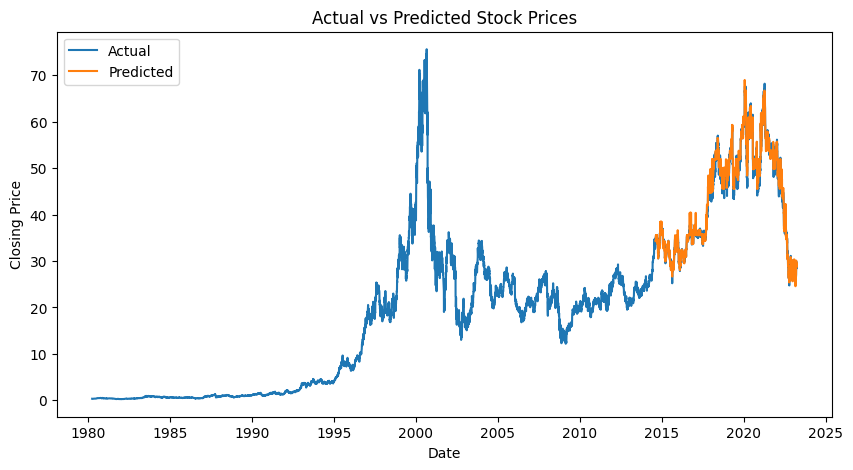

In [ ]:
# split data into training and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# fit model to training data
model.fit(X_train, y_train)

# generate predictions on test data
predicted_values = model.predict(X_test)
# plot actual and predicted values
plt.figure(figsize=(10,5))
plt.plot(df.index, y, label='Actual')
plt.plot(df.index[-len(predicted_values):], predicted_values, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()


<font color="purple" size ="7px">**LONG SHORT TERM MEMORY**

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gd

In [ ]:
df1 = df.reset_index()['Close']

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
training_size = int(len(df1) * 0.7)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [ ]:
train_data

array([[0.00127315],
       [0.00129059],
       [0.00120339],
       ...,
       [0.31910288],
       [0.31615613],
       [0.30986082]])

In [ ]:
def create_dataset(dataset, time_step ):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step - 1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
117/117 [==============================] - 58s 371ms/step - loss: 0.0020 - val_loss: 8.3173e-04
Epoch 2/100
117/117 [==============================] - 31s 268ms/step - loss: 4.4289e-04 - val_loss: 6.9526e-04
Epoch 3/100
117/117 [==============================] - 30s 254ms/step - loss: 3.2920e-04 - val_loss: 5.0387e-04
Epoch 4/100
117/117 [==============================] - 29s 248ms/step - loss: 3.2309e-04 - val_loss: 7.3383e-04
Epoch 5/100
117/117 [==============================] - 29s 248ms/step - loss: 2.5188e-04 - val_loss: 4.8736e-04
Epoch 6/100
117/117 [==============================] - 29s 250ms/step - loss: 2.2794e-04 - val_loss: 3.7992e-04
Epoch 7/100
117/117 [==============================] - 32s 270ms/step - loss: 2.1838e-04 - val_loss: 3.2921e-04
Epoch 8/100
117/117 [==============================] - 29s 250ms/step - loss: 2.2654e-04 - val_loss: 3.1418e-04
Epoch 9/100
117/117 [==============================] - 29s 249ms/step - loss: 1.9474e-04 - val_loss: 3.2198e

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
error_train = math.sqrt(mean_squared_error(y_train,train_predict))
error_test = math.sqrt(mean_squared_error(y_test,test_predict))
print(error_train)
print(error_test)

99/99 [==============================] - 4s 44ms/step
0.008103412426174905
0.012671911586320184


In [ ]:
test_data.shape

(3251, 1)

In [ ]:

number = 0
def fun(Days):
  import matplotlib.pyplot as plt
  if(Days == 0):
    return (0, plt)
  lst_output = []
  x_input = test_data[3151:].reshape(1,-1)
  temp_input = list(x_input)
  temp_input = temp_input[0].tolist()
  print(x_input)
  print(temp_input)
  n_steps = 100
  i = 0
  while(i < Days):
      
      if(len(temp_input) > 100):
          x_input = np.array(temp_input[1:])
          x_input = x_input.reshape((1, n_steps, 1))
          yhat = model.predict(x_input, verbose=0)
          temp_input.extend(yhat[0].tolist())
          temp_input = temp_input[1:]
          lst_output.extend(yhat.tolist())
          i = i+1
      else:
          x_input = x_input.reshape((1, n_steps,1))
          yhat = model.predict(x_input, verbose=0)
          temp_input.extend(yhat[0].tolist())
          lst_output.extend(yhat.tolist())
          i=i+1
  plt.plot(np.arange(1, Days+1),scaler.inverse_transform(lst_output))
  plt.xlabel("Number Of Days")
  plt.ylabel("Closing Stock Price")
  plt.title("Predicting Stock Price for Next N days", loc = 'center')
  return (lst_output, plt)

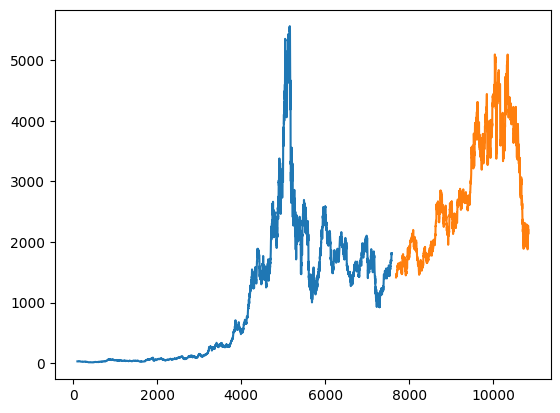

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
gd.themes.Glass()
interface = gd.Interface(fn = fun, inputs = "slider" , outputs = ["list", "plot"], theme="clean",
                         input_postion = "center", title = "STOCK PRICE PREDICTOR", submit_color="#d4dde2",
                         css =".gradio-container{background: url('https://png.pngtree.com/thumb_back/fh260/background/20200710/pngtree-pastel-rainbow-colored-gradient-background-banner-image_351656.jpg');background-size:cover;}")
interface.launch()

/usr/local/lib/python3.9/dist-packages/gradio/blocks.py:528: UserWarning:

Cannot load clean. Caught Exception: The space clean does not exist

/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:43: UserWarning:

You have unused kwarg parameters in Interface, please remove them: {'input_postion': 'center', 'submit_color': '#d4dde2'}



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

<font color="skyblue" size ="7px">**COMPARISION OF REGRESSION MODELS**

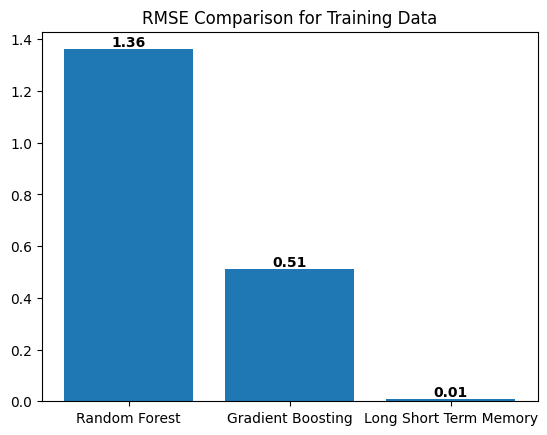

In [ ]:
model_names = ['Random Forest', 'Gradient Boosting', 'Long Short Term Memory']
rmse_scores = [rmse1, rmse_train_gradient, error_train]

fig, ax = plt.subplots()

ax.bar(model_names, rmse_scores)
ax.set_title("RMSE Comparison for Training Data")

# Add values to the bars
for i, v in enumerate(rmse_scores):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight='bold')

plt.show()

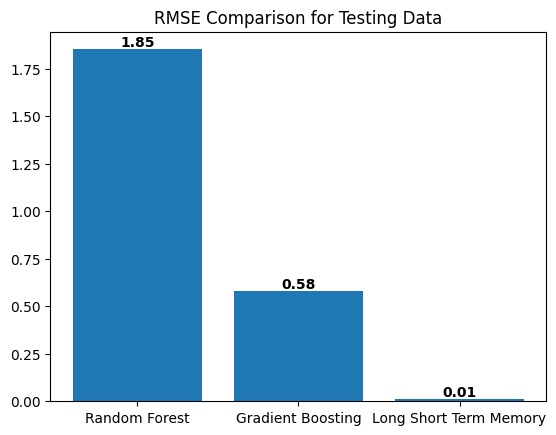

In [ ]:
model_names = ['Random Forest', 'Gradient Boosting', 'Long Short Term Memory']
rmse_scores = [rmse2, rmse_test_gradient, error_test]

fig, ax = plt.subplots()

ax.bar(model_names, rmse_scores)
ax.set_title("RMSE Comparison for Testing Data")

# Add values to the bars
for i, v in enumerate(rmse_scores):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight='bold')

plt.show()
